In [1]:
from __future__ import unicode_literals
import numpy as np
from scipy.signal import hilbert
import matplotlib.pyplot as plt

'''
En este script vamos a simular la ecuacion de swift-hohenberg con acoplamiento traslacional:

du/dt = eps * u(x+L) - u(x+L)**3 - d**2 u/dx**2 - d**4 u/dx**4 

'''

#Parametros del problema
dt = 0.1
dx = 1.0
N = 500 #Grid points

x = np.arange(N)*dx

### Parametros de la ecuacion
eps = -.3
L = 1.4

#### Condiciones iniciales

u_inicial = np.random.rand(N)*np.exp(1j*np.random.uniform(low = 0, high= 2*np.pi,size=N)).real
c_inicial = np.fft.fft(u_inicial)
c_new = c_inicial
k = 2*np.pi*np.fft.fftfreq(c_inicial.size, dx)

### Canvas, aqui dibujaremos la simulacion
Canvas = np.zeros((N,N), dtype=complex)
Canvas_fourier = np.zeros((N,N), dtype=complex)

### Calcula el termino cubico de la ecuacion de GL en Fourier
def cubic_fourier(c_actual):
    c_actual[N/3:2*N/3] = 0
    A_actual = np.fft.ifft(c_actual)
    cubic_term = A_actual*np.abs(A_actual)**2
    return np.fft.fft(cubic_term)

### Pasamos la ecuacion al espacio de Fourier:
##  c_n(t) = f(c_n(t))
##  Con c_n(t), la transformada de Fourier de u
def SH_fourier(c_actual):
    cubic_term = cubic_fourier(c_actual)
    return eps*c_actual*np.exp(1j*k*L) - cubic_term*np.exp(1j*k*L) + k**2*c_actual - k**4*c_actual

## Reolvemos el problema con RK4
def time_step(c_actual):
    k1 = SH_fourier(c_actual)
    k2 = SH_fourier(.5*k1*dt)
    k3 = SH_fourier(.5*k2*dt)
    k4 = SH_fourier(k3*dt)
    return c_actual + dt/6.0*(k1+ 2*k2 + 2*k3 + k4)

for i in range(N):
    for _ in range(50):
        c_new = time_step(c_new)
    Canvas_fourier[i,:] = c_new

Canvas = np.fft.ifft(Canvas_fourier)
envelope = np.abs(Canvas)
phase = np.angle(Canvas)

    

C:\Users\Asus\Anaconda2\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: overflow encountered in multiply


KeyboardInterrupt: 

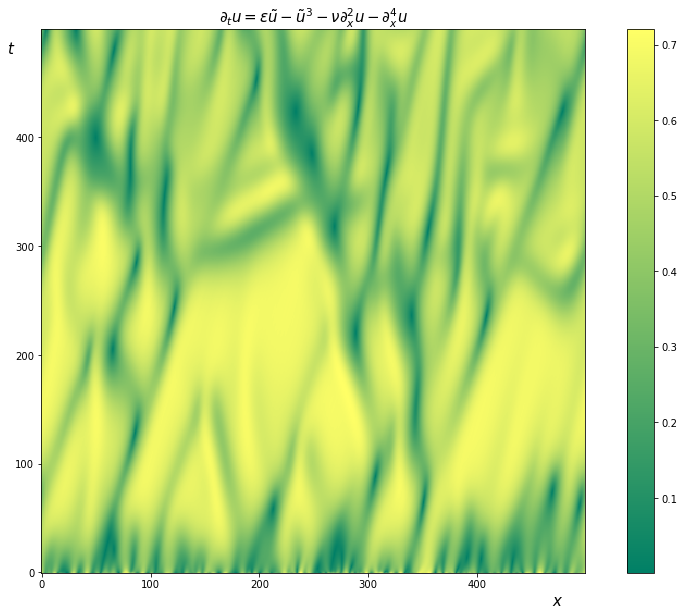

In [27]:
envelope_2 = np.abs(hilbert(Canvas.real))
### Grafico de la simulacion
plt.figure(figsize = (15,10))
plt.imshow(envelope_2, aspect='equal', cmap='summer', origin='lower')
plt.xlabel(r'$x$', fontsize=15, x = .95)
plt.ylabel(r'$t$', fontsize=15, y = .95, rotation=0)
plt.title(r'$\partial_t u = \varepsilon \tilde{u} - \tilde{u}^3 -  \nu\partial_x^2 u -\partial_x^4 u$', fontsize=15)
plt.colorbar()
plt.show()


In [18]:
hilbert(Canvas.real)

array([[ 0.02598460+0.09754281j, -0.21211392-0.05842706j,
        -0.17494391-0.3884124j , ...,  0.14609809-0.42051142j,
         0.28727941-0.23758485j,  0.24491008-0.01349863j],
       [ 0.02482323+0.11373179j, -0.19018303-0.02634729j,
        -0.18154829-0.2973707j , ...,  0.11383027-0.38160534j,
         0.27288081-0.2326587j ,  0.24574718+0.00390804j],
       [ 0.04235849+0.12234157j, -0.16831329+0.01850238j,
        -0.19996468-0.22286714j, ...,  0.10795773-0.34647074j,
         0.25318460-0.21407467j,  0.23834092+0.0047419j ],
       ..., 
       [ 0.42532367+0.30172164j,  0.06853303+0.51784691j,
        -0.33537580+0.40104418j, ..., -0.12831551-0.50139396j,
         0.27494518-0.44019934j,  0.50995659-0.10335864j],
       [ 0.47615924+0.21264507j,  0.16854378+0.49441414j,
        -0.25041608+0.45893425j, ..., -0.22418815-0.46652469j,
         0.18336599-0.48559572j,  0.47988236-0.20123254j],
       [ 0.50859825+0.11530475j,  0.26206551+0.45185089j,
        -0.15573201+0.4990830